# TP -  Introduction to Pytorch


## Tensors, Back-propagation, Hand-written digit recognition,  Language modeling
*************************************************************

**Recommended Reading:**

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

## Tensors

In [1]:
import torch

a = torch.FloatTensor(2, 3)
print(a)
print(a.mean())



 5.3086e-08  1.2141e-38  1.9279e-37
 6.5312e-39  3.4006e-06  3.3975e-06
[torch.FloatTensor of size 2x3]

1.1418588166852335e-06


### are Numpy arrays inside

In [2]:
a_ = a.numpy()
a_[0, 1] = 0.

print(a)


1.00000e-06 *
  0.0531  0.0000  0.0000
  0.0000  3.4006  3.3975
[torch.FloatTensor of size 2x3]



## Variables

In [3]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2))
print(x)
print(x.mean())

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 1
[torch.FloatTensor of size 1]



### are Tensors inside

In [4]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



### with automatic differentiation !

In [5]:
x.requires_grad=True

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

In [6]:
print(x.grad)

error = (10 - z).mean()
error.backward()

print(x.grad)

None
Variable containing:
-4.5000 -4.5000
-4.5000 -4.5000
[torch.FloatTensor of size 2x2]



# Back-propagation: example

On calcule les gradients $\frac{\partial L(y - h(x))}{\partial w}$ et $\frac{\partial L(y - h(x))}{\partial b}$, avec:
 - $h(x) = \sigma(w*x + b)$
 - $\sigma$ est la fonction logistique (sigmoid)
 - $L(y, \hat{y}) = (y - \hat{y})^2$ (erreur quadratique)
 - $y = 0.2$
 - $x = 1.5$
 - $b = -2$
 - $w = 3$

In [7]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)
h = torch.sigmoid(w * x + b)
error = (y - h)**2
error.backward()

print(h.data[0])
print(w.grad.data[0])
print(b.grad.data[0])

0.9241418242454529
0.1522950828075409
0.101530060172081


On minimize $L(y - h(x))$ pas à pas:

In [8]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

alpha = 0.1
for i in range(100):
    h = torch.sigmoid(w * x + b)
    error = (y - h)**2
    error.backward()
    
    w.data.sub_(alpha * w.grad.data)
    w.grad.data.zero_()  # must reset to 0 before next pass
    
    b.data.sub_(alpha * b.grad.data)
    b.grad.data.zero_()  # must reset to 0 before next pass
    
    print('Epoch {} h={:.05f} w={:.05f} b={:.05f}'.format(i+1, h.data[0], w.data[0], b.data[0]))

    

Epoch 1 h=0.92414 w=2.98477 b=-2.01015
Epoch 2 h=0.92180 w=2.96916 b=-2.02056
Epoch 3 h=0.91932 w=2.95316 b=-2.03123
Epoch 4 h=0.91671 w=2.93674 b=-2.04217
Epoch 5 h=0.91396 w=2.91990 b=-2.05340
Epoch 6 h=0.91104 w=2.90261 b=-2.06493
Epoch 7 h=0.90796 w=2.88486 b=-2.07676
Epoch 8 h=0.90470 w=2.86663 b=-2.08891
Epoch 9 h=0.90124 w=2.84791 b=-2.10140
Epoch 10 h=0.89757 w=2.82867 b=-2.11422
Epoch 11 h=0.89367 w=2.80889 b=-2.12741
Epoch 12 h=0.88953 w=2.78856 b=-2.14096
Epoch 13 h=0.88513 w=2.76766 b=-2.15489
Epoch 14 h=0.88044 w=2.74618 b=-2.16922
Epoch 15 h=0.87545 w=2.72408 b=-2.18395
Epoch 16 h=0.87014 w=2.70136 b=-2.19909
Epoch 17 h=0.86447 w=2.67801 b=-2.21466
Epoch 18 h=0.85844 w=2.65401 b=-2.23066
Epoch 19 h=0.85200 w=2.62934 b=-2.24711
Epoch 20 h=0.84513 w=2.60401 b=-2.26399
Epoch 21 h=0.83781 w=2.57801 b=-2.28133
Epoch 22 h=0.83001 w=2.55134 b=-2.29911
Epoch 23 h=0.82170 w=2.52402 b=-2.31732
Epoch 24 h=0.81286 w=2.49605 b=-2.33597
Epoch 25 h=0.80347 w=2.46746 b=-2.35503
Epoch 26 

On essaye différents paramètres pour le paramètre *alpha*.

On peut constater que plus on augmente le paramètre **alpha** plus **h** s'approche de de la valeur de **y**, donc plus l'erreur diminue.
Toutefois pour **alpha=100** la fonction **h** est nulle quelque soit le **epoch**, l'erreur est donc maximale.

# A vous de jouer !

Voici un jeu de données synthetique.

In [9]:
import numpy as np
import torch

np.random.seed(1337)

X_ = np.concatenate((
    np.random.random(size=(5000, 2)) - 0.5,
    np.random.multivariate_normal(size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))),
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))),
))

Y_ = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

X_ = np.asarray(X_, dtype='float32')
Y_ = np.asarray(Y_, dtype='float32')

# shuffle data points
perm = np.random.permutation(X_.shape[0])
X_ = X_[perm]
Y_ = Y_[perm]

# numpy arrays -> torch tensors
torch.manual_seed(1337)

X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

In [10]:
X.shape

torch.Size([10000, 2])

On crée deux jeux séparés: train / test.

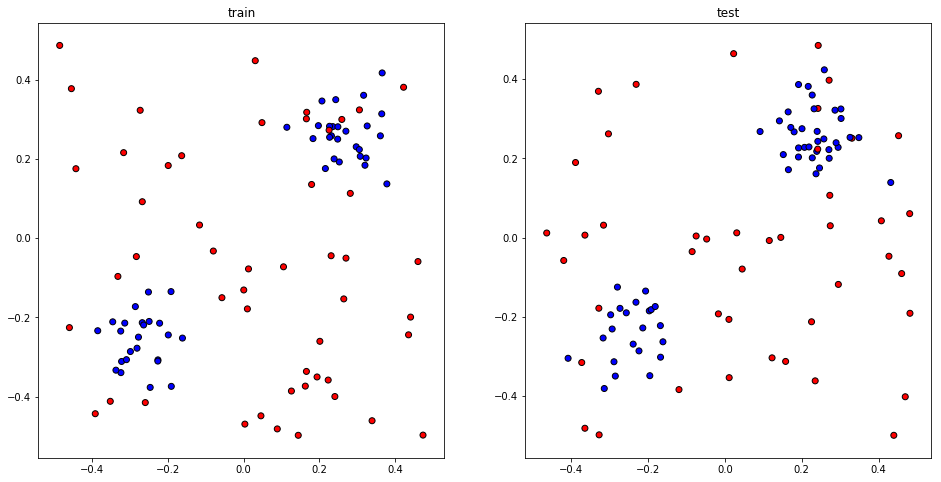

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# train / test split
n_train = 100
n_test = 100

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Nous allons maintenant implémenter un réseau de neurones sans couche cachée, qui prends en entrée $\mathbf{x} \in \mathbb{R}^2$ et produit une seule sortie $\mathbf{y} \in [0, 1]$ (sigmoid).

*Nous ferons ça sans utiliser les modules haut niveau de pytorch ! (optim, nn etc.)*

In [12]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

n_in = 2
params = []

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)
b = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    # H = 1/(torch.add(torch.exp(-1*torch.add(torch.matmul(X, W), b)), 1))
    H = torch.sigmoid(torch.mm(X,W) + b)
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood
    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb, Y_mb).mean()

        # Backward pass
        loss.backward()

        #Parameter update (gradient descent)
        W.data.sub_(alpha * W.grad.data)
        W.grad.data.zero_()
        
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=0.716508	test loss=0.707355	0/1 error=0.450
Epoch 002	train loss=0.707309	test loss=0.710176	0/1 error=0.580
Epoch 003	train loss=0.700548	test loss=0.692591	0/1 error=0.450
Epoch 004	train loss=0.691612	test loss=0.688396	0/1 error=0.440
Epoch 005	train loss=0.691559	test loss=0.686881	0/1 error=0.410
Epoch 006	train loss=0.689107	test loss=0.678973	0/1 error=0.540
Epoch 007	train loss=0.691710	test loss=0.679667	0/1 error=0.510
Epoch 008	train loss=0.683524	test loss=0.683344	0/1 error=0.340
Epoch 009	train loss=0.685814	test loss=0.676956	0/1 error=0.460
Epoch 010	train loss=0.686367	test loss=0.677614	0/1 error=0.420
Epoch 011	train loss=0.683490	test loss=0.680990	0/1 error=0.380
Epoch 012	train loss=0.684277	test loss=0.676587	0/1 error=0.420
Epoch 013	train loss=0.685105	test loss=0.679232	0/1 error=0.380
Epoch 014	train loss=0.676815	test loss=0.674861	0/1 error=0.420
Epoch 015	train loss=0.680517	test loss=0.675342	0/1 error=0.420
Epoch 016	train loss=0.67

Epoch 130	train loss=0.668697	test loss=0.675694	0/1 error=0.390
Epoch 131	train loss=0.670965	test loss=0.670731	0/1 error=0.370
Epoch 132	train loss=0.684072	test loss=0.669812	0/1 error=0.350
Epoch 133	train loss=0.673105	test loss=0.666385	0/1 error=0.350
Epoch 134	train loss=0.667956	test loss=0.665627	0/1 error=0.350
Epoch 135	train loss=0.684134	test loss=0.665472	0/1 error=0.280
Epoch 136	train loss=0.675727	test loss=0.668883	0/1 error=0.320
Epoch 137	train loss=0.680994	test loss=0.668063	0/1 error=0.310
Epoch 138	train loss=0.683956	test loss=0.671057	0/1 error=0.300
Epoch 139	train loss=0.676964	test loss=0.669980	0/1 error=0.310
Epoch 140	train loss=0.679020	test loss=0.667858	0/1 error=0.300
Epoch 141	train loss=0.674527	test loss=0.668535	0/1 error=0.310
Epoch 142	train loss=0.681179	test loss=0.670259	0/1 error=0.330
Epoch 143	train loss=0.683385	test loss=0.675921	0/1 error=0.430
Epoch 144	train loss=0.676011	test loss=0.670619	0/1 error=0.340
Epoch 145	train loss=0.66

Puis on visualise la distribution apprise par notre modèle:

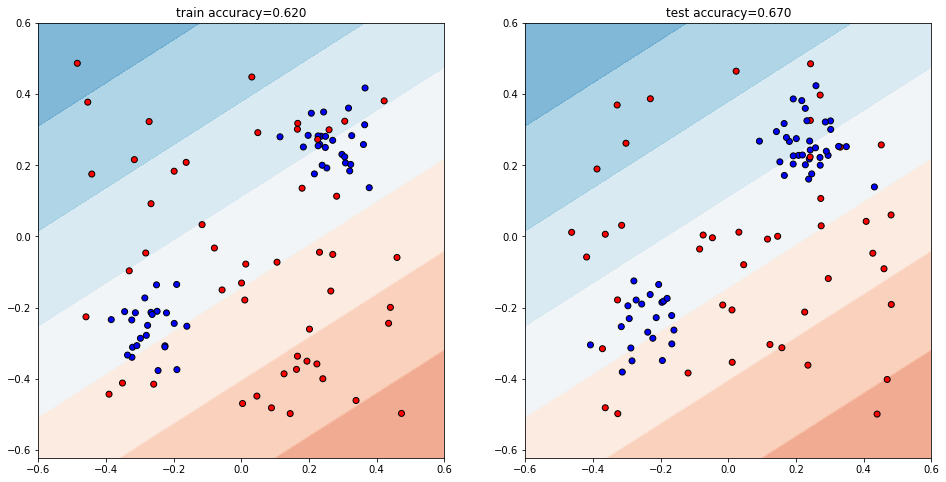

In [13]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Dans le but d'obtenir de meilleurs résultats, on ajoute une couche cachée de taille 10 à notre réseau de neurones, avec la fonction d'activation ReLU, qui correspond à :
$$f(x)=max(0,x)$$

In [14]:
# TODO:
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
torch.manual_seed(0)

n_in = 2
n_cache = 10
params = []

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_cache), np.sqrt(2/(n_in + n_cache))), requires_grad=True)
W2 = Variable(torch.normal(torch.zeros(n_cache, n_out), np.sqrt(2/(n_cache + n_out))), requires_grad=True)

b = Variable(torch.zeros(n_cache), requires_grad=True)
b2 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    Z=F.relu(torch.mm(X,W)+b)
    H = torch.sigmoid(torch.mm(Z,W2) + b2) # Changée
    
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb, Y_mb).sum() # Changée

        # Backward pass
        loss.backward()

        #Parameter update (gradient descent)
        W.data.sub_(alpha * W.grad.data) 
        W.grad.data.zero_()
        
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()
        
        b.data.sub_(alpha * b.grad.data) 
        b.grad.data.zero_()
        
        b2.data.sub_(alpha * b2.grad.data)
        b2.grad.data.zero_()

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=6.126827	test loss=0.557159	0/1 error=0.210
Epoch 002	train loss=5.146429	test loss=0.685536	0/1 error=0.500
Epoch 003	train loss=4.579123	test loss=0.537937	0/1 error=0.280
Epoch 004	train loss=4.757044	test loss=0.513057	0/1 error=0.170
Epoch 005	train loss=4.438590	test loss=0.487121	0/1 error=0.140
Epoch 006	train loss=4.596208	test loss=0.581661	0/1 error=0.340
Epoch 007	train loss=4.382085	test loss=0.480945	0/1 error=0.160
Epoch 008	train loss=4.705790	test loss=0.500202	0/1 error=0.180
Epoch 009	train loss=4.652205	test loss=0.555608	0/1 error=0.300
Epoch 010	train loss=4.594692	test loss=0.478141	0/1 error=0.130
Epoch 011	train loss=4.439246	test loss=0.488289	0/1 error=0.200
Epoch 012	train loss=4.533288	test loss=0.503229	0/1 error=0.160
Epoch 013	train loss=4.493277	test loss=0.566904	0/1 error=0.310
Epoch 014	train loss=4.190063	test loss=0.453316	0/1 error=0.160
Epoch 015	train loss=4.530209	test loss=0.549551	0/1 error=0.330
Epoch 016	train loss=4.29

Epoch 128	train loss=2.410869	test loss=0.428423	0/1 error=0.170
Epoch 129	train loss=2.326094	test loss=0.414763	0/1 error=0.110
Epoch 130	train loss=2.512770	test loss=0.417863	0/1 error=0.150
Epoch 131	train loss=2.925665	test loss=0.390673	0/1 error=0.120
Epoch 132	train loss=2.375578	test loss=0.551967	0/1 error=0.310
Epoch 133	train loss=2.208816	test loss=0.495197	0/1 error=0.220
Epoch 134	train loss=2.461563	test loss=0.406252	0/1 error=0.120
Epoch 135	train loss=2.518934	test loss=0.420571	0/1 error=0.120
Epoch 136	train loss=2.448009	test loss=0.448890	0/1 error=0.200
Epoch 137	train loss=3.400359	test loss=0.450061	0/1 error=0.240
Epoch 138	train loss=2.457013	test loss=0.448879	0/1 error=0.130
Epoch 139	train loss=2.277527	test loss=0.411138	0/1 error=0.180
Epoch 140	train loss=2.441638	test loss=0.604937	0/1 error=0.340
Epoch 141	train loss=2.552813	test loss=0.402008	0/1 error=0.110
Epoch 142	train loss=2.409695	test loss=0.553783	0/1 error=0.310
Epoch 143	train loss=2.32

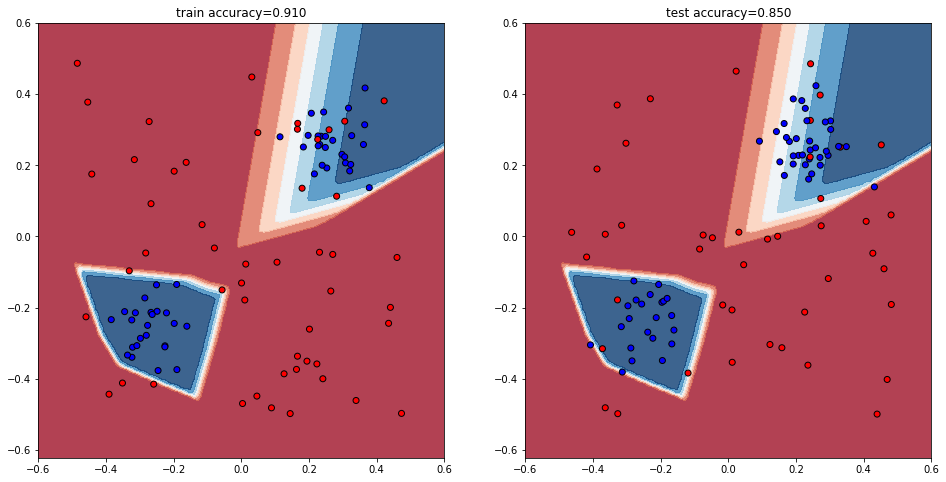

In [15]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

On obtient des résultats qui sont plutôt corrects avec une couche cachée.

Pour aller plus loin, nous allons ajouter **une deuxième couche cachée** de taille $20$ avec cette fois une correction $tanh$ et **la première couche** sera de taille $15$, puis on analyser les résulats.

In [23]:
# TODO: Bonus
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
torch.manual_seed(0)

n_in = 2
n_cache1 = 15
n_cache2 = 20
params = []

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_cache1), np.sqrt(2/(n_in + n_cache1))), requires_grad=True)
W2 = Variable(torch.normal(torch.zeros(n_cache1, n_cache2), np.sqrt(2/(n_cache1 + n_cache2))), requires_grad=True)
W3 = Variable(torch.normal(torch.zeros(n_cache2, n_out), np.sqrt(2/(n_cache2 + n_out))), requires_grad=True)

b = Variable(torch.zeros(n_cache1), requires_grad=True)
b2 = Variable(torch.zeros(n_cache2), requires_grad=True)
b3 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    Z=F.relu(torch.mm(X,W)+b)
    Z2=F.tanh(torch.mm(Z,W2)+b2)
    H = torch.sigmoid(torch.mm(Z2,W3) + b3) 
    
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb, Y_mb).sum()

        # Backward pass
        loss.backward()

        #Parameter update (gradient descent)
        W.data.sub_(alpha * W.grad.data)
        W.grad.data.zero_()
        
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()
        
        W3.data.sub_(alpha * W3.grad.data) 
        W3.grad.data.zero_()
        
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()
        
        b2.data.sub_(alpha * b2.grad.data) 
        b2.grad.data.zero_()
        
        b3.data.sub_(alpha * b3.grad.data)
        b3.grad.data.zero_()

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=6.262037	test loss=0.579317	0/1 error=0.300
Epoch 002	train loss=5.568309	test loss=0.589957	0/1 error=0.390
Epoch 003	train loss=3.646091	test loss=0.380918	0/1 error=0.130
Epoch 004	train loss=3.696050	test loss=0.336290	0/1 error=0.140
Epoch 005	train loss=4.012663	test loss=0.427045	0/1 error=0.170
Epoch 006	train loss=3.958471	test loss=0.385613	0/1 error=0.160
Epoch 007	train loss=3.962052	test loss=0.405368	0/1 error=0.170
Epoch 008	train loss=3.773041	test loss=0.434791	0/1 error=0.180
Epoch 009	train loss=3.778961	test loss=0.458083	0/1 error=0.200
Epoch 010	train loss=3.659515	test loss=0.355773	0/1 error=0.130
Epoch 011	train loss=3.624687	test loss=0.358512	0/1 error=0.170
Epoch 012	train loss=3.943661	test loss=0.442170	0/1 error=0.190
Epoch 013	train loss=3.315484	test loss=0.368191	0/1 error=0.170
Epoch 014	train loss=3.140185	test loss=0.405151	0/1 error=0.190
Epoch 015	train loss=3.685206	test loss=0.364651	0/1 error=0.140
Epoch 016	train loss=2.93

Epoch 128	train loss=3.335596	test loss=0.330189	0/1 error=0.110
Epoch 129	train loss=3.698881	test loss=0.356087	0/1 error=0.100
Epoch 130	train loss=3.597034	test loss=0.306384	0/1 error=0.110
Epoch 131	train loss=2.779485	test loss=0.360306	0/1 error=0.110
Epoch 132	train loss=2.888305	test loss=0.390662	0/1 error=0.130
Epoch 133	train loss=3.255657	test loss=0.347939	0/1 error=0.120
Epoch 134	train loss=3.300792	test loss=0.586926	0/1 error=0.390
Epoch 135	train loss=3.336500	test loss=0.374728	0/1 error=0.110
Epoch 136	train loss=2.844300	test loss=0.381655	0/1 error=0.120
Epoch 137	train loss=3.070517	test loss=0.384686	0/1 error=0.130
Epoch 138	train loss=3.505729	test loss=0.320331	0/1 error=0.110
Epoch 139	train loss=2.895196	test loss=0.305117	0/1 error=0.110
Epoch 140	train loss=3.369018	test loss=0.295080	0/1 error=0.100
Epoch 141	train loss=2.783244	test loss=0.510526	0/1 error=0.380
Epoch 142	train loss=3.294665	test loss=0.326378	0/1 error=0.120
Epoch 143	train loss=2.90

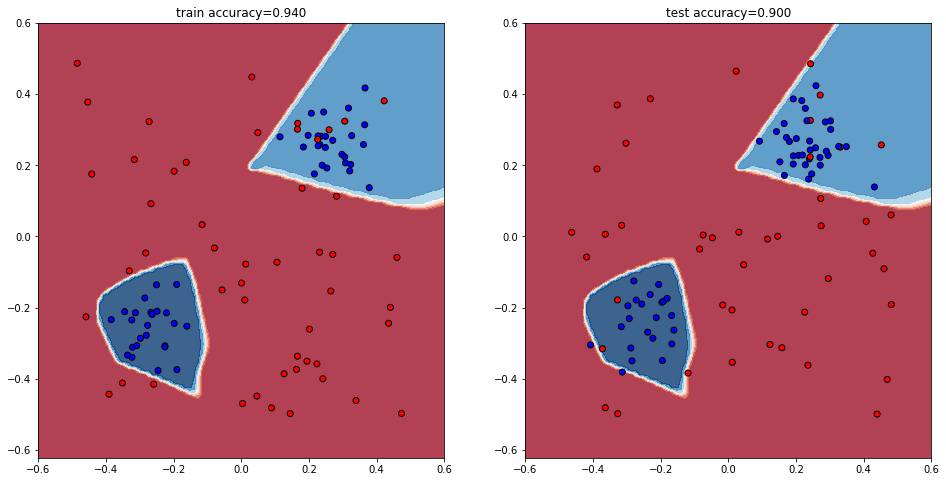

In [24]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

# MNIST

Nous allons maintenant utiliser les fonctions haut niveau de pytorch: torch.nn, torch.optim etc.

On commence par charger les données:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms

mnist_folder = '/Users/ChafiounDean/MNIST_data/'

train_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=True)
test_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=False)

In [3]:
print("Nombre d'images dans le train set:", len(train_data))
print("Nombre d'images dans le train set:", len(test_data))

Nombre d'images dans le train set: 60000
Nombre d'images dans le train set: 10000


In [4]:
train_data[50][1]

3

### Afficher quelques images

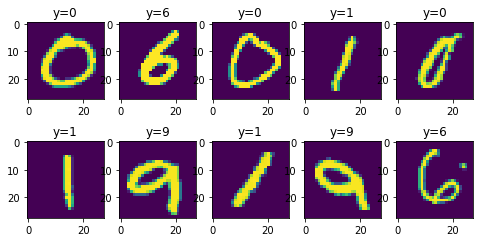

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4), squeeze=False)
seed = 135 # changer la seed pour afficher d'autres images

for i in range(10):
    r = i // 5
    c = i % 5
    np.random.seed(seed+i)
    idx = np.random.choice(len(train_data), 1)[0]
    x = train_data[idx][0].numpy()
    y = train_data[idx][1]
    axes[r, c].imshow(x[0, :, :])
    axes[r, c].set_title('y={}'.format(y))
    
plt.show()

### Modèle initial

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Training settings
seed = 1337
lr = 0.1
epochs = 25
train_batch_size = 50
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)

    def forward(self, X):
        X = X.view(-1, 28*28)  # flatten images
        X = self.fc1(X)
        return F.log_softmax(X, dim=1)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


for epoch in range(1, epochs + 1):
    
    print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    
    test_loss, test_error = test()
    print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))


Epoch 1...
Train negative log-likelihood: 0.451620
Test  negative log-likelihood: 0.325028 0/1 error: 0.089300
Epoch 2...
Train negative log-likelihood: 0.326872
Test  negative log-likelihood: 0.299519 0/1 error: 0.083600
Epoch 3...
Train negative log-likelihood: 0.306649
Test  negative log-likelihood: 0.290156 0/1 error: 0.079900
Epoch 4...
Train negative log-likelihood: 0.296166
Test  negative log-likelihood: 0.283710 0/1 error: 0.079000
Epoch 5...
Train negative log-likelihood: 0.289250
Test  negative log-likelihood: 0.279869 0/1 error: 0.077200
Epoch 6...
Train negative log-likelihood: 0.284068
Test  negative log-likelihood: 0.277935 0/1 error: 0.079600
Epoch 7...
Train negative log-likelihood: 0.280040
Test  negative log-likelihood: 0.273939 0/1 error: 0.078400
Epoch 8...
Train negative log-likelihood: 0.276621
Test  negative log-likelihood: 0.273529 0/1 error: 0.075200
Epoch 9...
Train negative log-likelihood: 0.274159
Test  negative log-likelihood: 0.272867 0/1 error: 0.077000
E

Nous modifions ensuite certains paramètres :
- lr
- epochs
- train_batch_size

Avec pour optique de voir si certains d'entre entre permettent d'obtenir de bons résulats.  

Avec lr = 0.1, epoch 25 et train_batch_size = 50, arrive à atteintre une performance de 0.0753, qui semble être la meilleure.

## Améliorez votre modèle

Améliorez votre modèle afin de diminuer l'erreur sur le jeu de test. Essayez différentes architectures / hyperparamètres et à chaque fois reportez vos résultats.

Objectif: passer sous les 1% d'erreur: http://yann.lecun.com/exdb/mnist/

Pistes à essayer:
- plus de couches cachées
- convolutions + max pooling
- dropout
- couches résiduelles

Astuces:
- changer l'algorithme de descente de gradient (Adam)
- implémentez une stratégie d'early stopping: $n$ epochs sans amélioration -> arret
- implémentez une stratégie de diminution du learning rate: $n/2$ epochs sans amélioration -> $\alpha = \alpha / 2$ (torch.optim.lr_scheduler.ReduceLROnPlateau)

**Pour cette partie, afin dr voir les meilleurs resultats, il faut privilègier une machine avec des GPUs assez puissants.**

In [ ]:
# TODO :
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Training settings
seed = 1337
lr = 0.001
epochs = 10
train_batch_size =25
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, X):
        X = F.max_pool2d(self.conv1(X), 2)
        X = F.max_pool2d(F.relu(self.conv2(X)), 2)
        X = X.view(-1, 320)
        X = F.relu(self.fc1(X))
        X = F.dropout(X, training=self.training)
        X = F.relu(self.fc2(X))
        return F.log_softmax(X, dim=1)

model = Net()

optimizer = optim.Adam(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


for epoch in range(1, epochs + 1):
    
    print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    
    test_loss, test_error = test()
    print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))

Epoch 1...
Train negative log-likelihood: 0.451605
Test  negative log-likelihood: 0.096894 0/1 error: 0.030000
Epoch 2...
Train negative log-likelihood: 0.204856
Test  negative log-likelihood: 0.071645 0/1 error: 0.021900
Epoch 3...
Train negative log-likelihood: 0.159763
Test  negative log-likelihood: 0.055417 0/1 error: 0.018100
Epoch 4...
Train negative log-likelihood: 0.135580
Test  negative log-likelihood: 0.053031 0/1 error: 0.016100
Epoch 5...
Train negative log-likelihood: 0.123423
Test  negative log-likelihood: 0.045754 0/1 error: 0.014600
Epoch 6...


Malgré la lourdeur des calculs, on arrive a obtenir une erreur inferieur à $1$% entre l'**Epoch 8** et l'**Epoch 9**.

## NLP: N-Gram Language Modeling

Modèle NGram: sachant les mots $n$ précédents on veut prédire le prochain mot:

\begin{equation*}
P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1})
\end{equation*}

Où $w_i$ est le ième mot d'une phrase.

Veuillez considérer de modèle de prédiction de trigram suivant :

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [13]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out,dim=1)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]
[
 521.9229
[torch.FloatTensor of size 1]
, 
 497.1978
[torch.FloatTensor of size 1]
, 
 473.8831
[torch.FloatTensor of size 1]
, 
 451.2239
[torch.FloatTensor of size 1]
, 
 428.6620
[torch.FloatTensor of size 1]
, 
 405.7259
[torch.FloatTensor of size 1]
, 
 382.1755
[torch.FloatTensor of size 1]
, 
 357.7984
[torch.FloatTensor of size 1]
, 
 332.5713
[torch.FloatTensor of size 1]
, 
 306.5841
[torch.FloatTensor of size 1]
, 
 280.0388
[torch.FloatTensor of size 1]
, 
 253.3304
[torch.FloatTensor of size 1]
, 
 226.8791
[torch.FloatTensor of size 1]
, 
 201.2291
[torch.FloatTensor of size 1]
, 
 176.8636
[torch.FloatTensor of size 1]
, 
 154.2288
[torch.FloatTensor of size 1]
, 
 133.6749
[torch.FloatTensor of size 1]
, 
 115.3694
[torch.FloatTensor of size 1]
, 
 99.4167
[torch.FloatTensor of size 1]
, 
 85.7424
[torch.FloatTensor of size 1]
, 
 74.2369
[torch.FloatTensor of size 1]


### Utilisez vos propres valeurs pour context

In [21]:
# context = # TODO
context = ['own', 'deep']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['own', 'deep'] sunken


In [22]:
# context = # TODO
context = ['treasure', 'thy']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['treasure', 'thy'] beauty's


Ici on peut voir que même si les mots ne se suivent pas, il retourne quand même le mot le plus probable sachant le "context".

In [23]:
# context = # TODO
context = ['and', 'thriftless']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['and', 'thriftless'] praise.


In [24]:
# context = # TODO
context = ['Proving', 'his']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['Proving', 'his'] beauty


## CBOW: Continuous Bag-of-Words
CBOW = Prédire un mot sachant les mots d'avant et les mots d'après.

Exercice : en utilisant l'exemple précédent, codez un modèle CBOW.

In [33]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)

CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMBEDDING_DIM = 10
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

class CBOW(nn.Module):

    def __init__(self,vocab_size, embedding_dim, context_size):
        super(CBOW, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim * context_size, 128)
        self.linear2 = nn.Linear(128, vocab_size)
        
    def forward(self, inputs):
        embeds = self.embedding(inputs).view(1, -1)
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out,dim=1)
        return log_probs

losses = []
model = CBOW(len(word_to_ix), 10, 4)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(500):
    total_loss = torch.Tensor([0])
    for context, target in data:
        model.zero_grad()
        context_vars = Variable(torch.LongTensor([word_to_ix[word] for word in context]))
        log_probs = model(context_vars)
        loss = loss_function(log_probs, Variable(torch.LongTensor([word_to_ix[target]])))
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    losses.append(total_loss)
print(losses)

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]
[
 226.1661
[torch.FloatTensor of size 1]
, 
 224.8364
[torch.FloatTensor of size 1]
, 
 223.5141
[torch.FloatTensor of size 1]
, 
 222.1986
[torch.FloatTensor of size 1]
, 
 220.8903
[torch.FloatTensor of size 1]
, 
 219.5884
[torch.FloatTensor of size 1]
, 
 218.2918
[torch.FloatTensor of size 1]
, 
 217.0017
[torch.FloatTensor of size 1]
, 
 215.7161
[torch.FloatTensor of size 1]
, 
 214.4339
[torch.FloatTensor of size 1]
, 
 213.1560
[torch.FloatTensor of size 1]
, 
 211.8822
[torch.FloatTensor of size 1]
, 
 210.6129
[torch.FloatTensor of size 1]
, 
 209.3474
[torch.FloatTensor of size 1]
, 
 208.0844
[torch.FloatTensor of size 1]
, 
 206.8237
[torch.FloatTensor of size 1]
, 
 205.5657
[torch.FloatTensor of size 1]
, 
 204.3091
[torch.FloatTensor of size 1]
, 
 203.0544
[torch.F

In [35]:
context = ['People', 'create',  'to', 'direct']
context_var = make_context_vector(context, word_to_ix)
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])
# On obtient probablement "programs"

['People', 'create', 'to', 'direct'] programs


In [36]:
context = ['processes', 'are' ,'beings', 'that' ]
context_var = make_context_vector(context, word_to_ix)
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])
# On espere obtenir ici "abstract"

['processes', 'are', 'beings', 'that'] abstract


In [40]:
context = ['People', 'create' ,'direct', 'processes' ]
context_var = make_context_vector(context, word_to_ix)
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])
# Il y a quand même "to" parmi entre ces mots.

['People', 'create', 'direct', 'processes'] programs
